# Extract sequences of infection data for future neural network training
## resultant dataset is formed of:
## - n daily infection numbers
## - n+1th daily infection number

In [1]:
import csv
import numpy as np


In [2]:
# read each line of infection data as an entry to a list
Infections_data = []
with open('time_series_covid19_confirmed_global.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    # skip first row with column headings
    for row in csv_reader:
        if line_count>0:
                
            # deal with uneven list lengths
            if row[-1] == '':
                Short_row = row[4:-1]
                Short_row = [int(x) for x in Short_row]
                Total_infections = np.asarray(np.append(Short_row,0),dtype = 'float')

            else :
                Long_row = row[4:]
                Long_row = [int(x) for x in Long_row]
                Total_infections = np.asarray(Long_row,dtype = 'float')
            # want daily infection number and not total infection number so far
            
            #Daily_infections = np.diff(Total_infections)
            Infections_data.append(Total_infections)
        line_count += 1

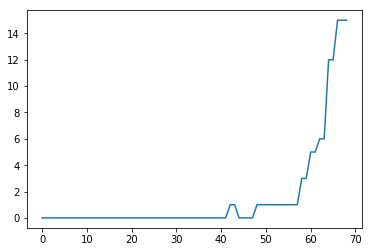

In [4]:
import matplotlib.pyplot as plt
plt.plot(Infections_data[10])

In [5]:
memory_length = 5
# network input is previous "memory length" infection counts
memory_data = []
# network output is infection rate on "memory length" + 1 day
results = []
# loop over each row in dataset
for ii in range(0,len(Infections_data)):
    
    Infections_row = Infections_data[ii] # convert to integer list
    # loop over each entry in row but not all the way to the end
    for jj in range(0,len(Infections_row)-(memory_length+1)):
        # only interested in non-zero infections
        if Infections_row[jj]>0:
            memory_data.append(Infections_row[jj:jj+memory_length])
            results.append(Infections_row[jj+memory_length])


In [6]:
print(len(memory_data))
test_ind = 99
print(memory_data[test_ind])
print(results[test_ind])

6663
[2. 2. 3. 3. 3.]
4.0


In [7]:
with open("Total_infected_inputs_length_" + str(memory_length) + ".csv","w") as f:
    wr = csv.writer(f,delimiter=',',lineterminator='\n')
    wr.writerows(memory_data)
    
# don't know how to write one entry per row
with open("Total_infected_outputs_length_" + str(memory_length) + ".csv","w") as f:
    wr = csv.writer(f)
    wr.writerow(results)
    

In [51]:
X = []
with open("network_inputs_length_" + str(memory_length) + ".csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    # skip first row with column headings
    for row in csv_reader:
        X.append(row)
        
X = np.asarray(X,dtype = 'float')

Y = []
with open("network_outputs_length_" + str(memory_length) + ".csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    # skip first row with column headings
    for row in csv_reader:
        Y.append(row)

Y = np.asarray(Y[0],dtype = 'float')
print(len(X))
print(len(Y))
print(X[21])
print(Y[21])

5892
5892
[33. 33. 33. 33.]
34.0
